In [2]:
import tensorflow.keras as keras

2023-11-21 12:33:40.039304: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-21 12:33:40.041304: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-21 12:33:40.068935: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-21 12:33:40.068974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-21 12:33:40.071483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Using a simple logistic regression model to predict 3 classes 

Logistic regression is generally used for binary classification, but it can be extended to handle multiple classes through "one-vs-all" strategy:
- One-Hot Encoding (each class should have a binary column, indicating its presence or absence)
- Training three separate logistic regression models (for each model, the target variable to the one-hot encoded vector for the corresponding class : Class 1 vs. Not Class 1, Class 2 vs. Not Class 2, Class 3 vs. Not Class 3)
- For obtain a prediction from a given input, we get predictions from all three models. The class with the highest predicted probability is the final prediction for that input.

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
df = pd.read_csv("data/data_pred_ci3.csv")

In [52]:
df["CI3"] = df["CI3"].apply(lambda x: 0 if x < 0 else 1 if x < 2 else 2)

In [53]:
df["CI3"].value_counts()

CI3
0    46
1    33
2    11
Name: count, dtype: int64

In [54]:
y = df["CI3"].values
X = df.drop(columns=["CI3", "Unnamed: 0"]).values

print(X.shape, y.shape)

(90, 275) (90,)


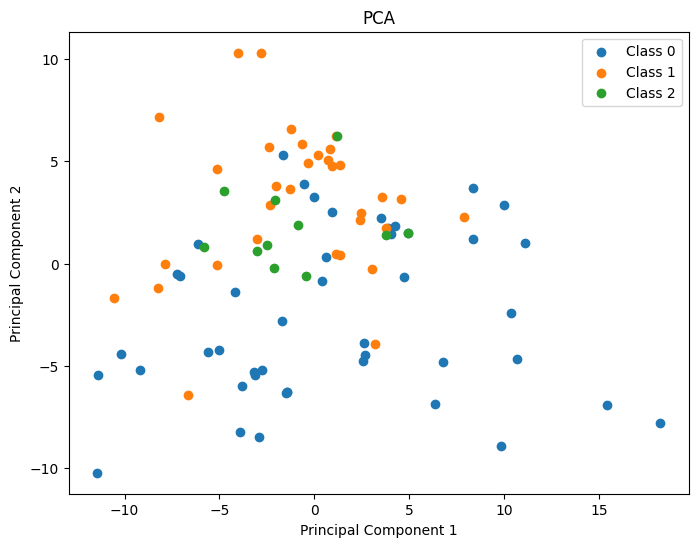

In [56]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))

for i in range(3):
    indices = (y == i)
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=f"Class {i}")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA")
plt.legend()
plt.show()

In [57]:
# One-Hot Encoding
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.reshape(-1, 1)).toarray()

# Model Training with k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = []
for i in range(3):
    model = LogisticRegression(max_iter=1000)
    # Use cross_val_predict to get predictions for each fold
    predictions = cross_val_predict(model, X, y_encoded[:, i], cv=kf, method='predict_proba')[:, 1]
    models.append(predictions)

# Combine predictions and choose the class with the highest probability
final_predictions = np.argmax(models, axis=0)

# Evaluate the accuracy
accuracy = accuracy_score(y, final_predictions)
print("Accuracy:", accuracy)


Accuracy: 0.6111111111111112


In [58]:
rf_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  

accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)


average_accuracy = np.mean(accuracies)
print("Average Accuracy:", round(average_accuracy, 2))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Average Accuracy: 0.69

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.71      0.83      0.77         6
           2       0.00      0.00      0.00         4

    accuracy                           0.67        18
   macro avg       0.47      0.57      0.52        18
weighted avg       0.55      0.67      0.60        18


Confusion Matrix:
[[7 0 1]
 [1 5 0]
 [2 2 0]]


## Using a simple NN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Epoch 1/20
2/2 [==============================] - 1s 114ms/step - loss: 5.2504 - accuracy: 0.3611 - val_loss: 5.1310 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 0s 24ms/step - loss: 5.0888 - accuracy: 0.3750 - val_loss: 5.0154 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 0s 24ms/step - loss: 4.8599 - accuracy: 0.4306 - val_loss: 4.9093 - val_accuracy: 0.2778
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 4.7910 - accuracy: 0.4306 - val_loss: 4.8105 - val_accuracy: 0.2778
Epoch 5/20
2/2 [==============================] - 0s 22ms/step - loss: 4.8396 - accuracy: 0.3750 - val_loss: 4.7205 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 0s 22ms/step - loss: 4.5882 - accuracy: 0.5000 - val_loss: 4.6352 - val_accuracy: 0.2778
Epoch 7/20
2/2 [==============================] - 0s 23ms/step - loss: 4.5750 - accuracy: 0.4722 - val_loss: 4.5536 - val_accuracy: 0.2778
Epoch 8/20
2/2 [==========

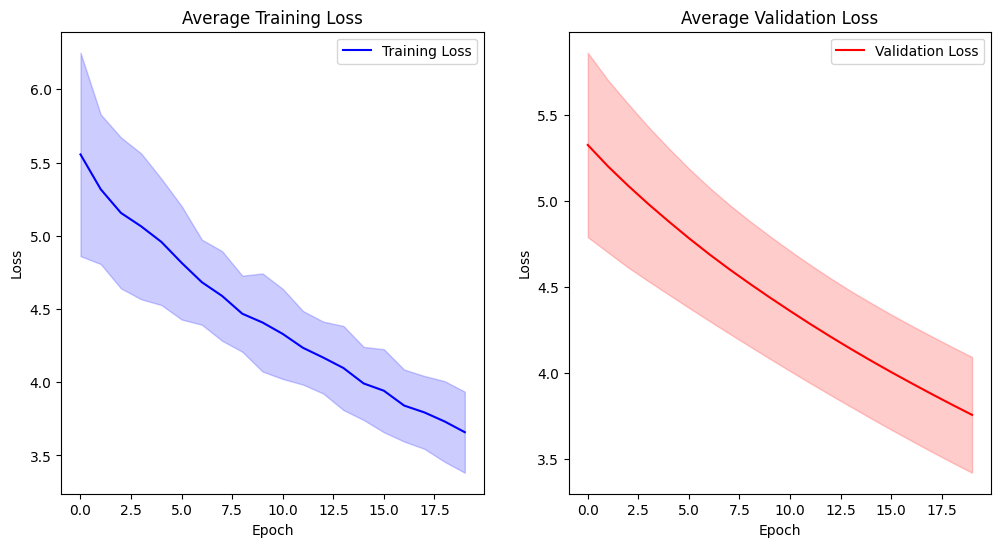

In [95]:
def create_model(l2_reg=0.05):
    model = keras.Sequential([
        keras.layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_reg), input_shape=(X.shape[1],)),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(l2_reg)),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=42)  

all_train_losses = []
all_val_losses = []
all_val_accuracies = []

for train_index, test_index in kf.split(X_scaled):
    X_train, X_val = X_scaled[train_index], X_scaled[test_index]
    y_train, y_val = y[train_index], y[test_index]

    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

    all_train_losses.append(history.history['loss'])
    all_val_losses.append(history.history['val_loss'])
    all_val_accuracies.append(history.history['val_accuracy'])

mean_train_loss = np.mean(all_train_losses, axis=0)
mean_val_loss = np.mean(all_val_losses, axis=0)
mean_val_accuracy = np.mean(all_val_accuracies, axis=0)

std_train_loss = np.std(all_train_losses, axis=0)
std_val_loss = np.std(all_val_losses, axis=0)
std_val_accuracy = np.std(all_val_accuracies, axis=0)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(mean_train_loss, 'b-', label='Training Loss')
plt.fill_between(range(len(mean_train_loss)),
                 mean_train_loss - std_train_loss,
                 mean_train_loss + std_train_loss,
                 color='blue', alpha=0.2)
plt.title('Average Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mean_val_loss, 'r-', label='Validation Loss')
plt.fill_between(range(len(mean_val_loss)),
                 mean_val_loss - std_val_loss,
                 mean_val_loss + std_val_loss,
                 color='red', alpha=0.2)
plt.title('Average Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()